In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df = pd.read_csv(r"Airbnb_data.csv")

In [3]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df.shape

(48895, 16)

# Checking duplicates and missing values

In [7]:
df.duplicated().sum()


0

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Missing data handling

In [11]:
# Dropping columns that are less relevant for price prediction
# Created a variable cleaned_data to clean the data
columns_to_drop = ['id','name', 'host_id', 'host_name', 'last_review']
cleaned_data = df.drop(columns=columns_to_drop)

In [12]:
cleaned_data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
cleaned_data['reviews_per_month'].fillna(cleaned_data['reviews_per_month'].mean(), inplace=True)

C:\Users\NILADRI DAS\AppData\Local\Temp\ipykernel_11956\2471413307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['reviews_per_month'].fillna(cleaned_data['reviews_per_month'].mean(), inplace=True)


In [14]:
cleaned_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
cleaned_data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2


# Removing outliers

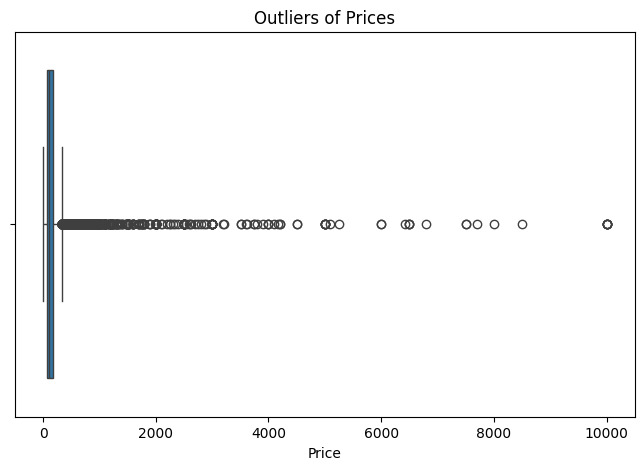

In [16]:
# Boxplot for Prices to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_data['price'])
plt.title('Outliers of Prices')
plt.xlabel('Price')
plt.show()

In [17]:
# Removing outlier
min_range = cleaned_data["price"].mean() - (3*cleaned_data["price"].std())
max_range = cleaned_data["price"].mean() + (3*cleaned_data["price"].std())

In [18]:
min_range,max_range

(-567.7418220547338, 873.1831964283917)

In [19]:
Outlier_removed_data = cleaned_data[cleaned_data["price"]<= max_range]

In [20]:
Outlier_removed_data.head(4)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194


In [21]:
Outlier_removed_data.shape

(48507, 11)

In [22]:
Outlier_removed_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Exploratory Data Analysis(EDA)

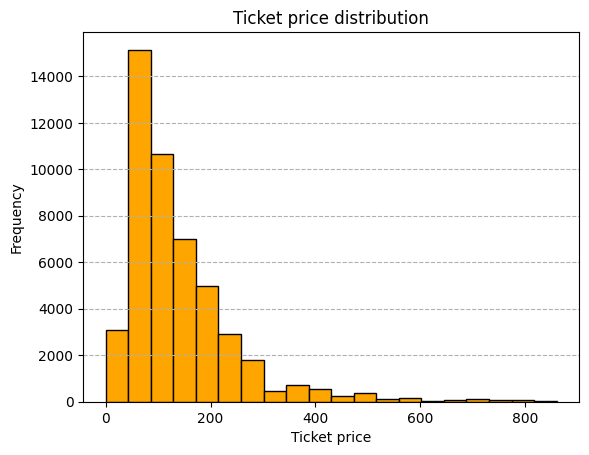

In [23]:
# Creating histogram to observe the price distribution
plt.hist(Outlier_removed_data["price"], bins=20, color='orange', edgecolor='black')
plt.xlabel("Ticket price")
plt.ylabel("Frequency")
plt.title("Ticket price distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.show()

In [24]:
# We are getting a lenear graph from the histogram chart.
# We can see most dominant price range is 40-80.
 


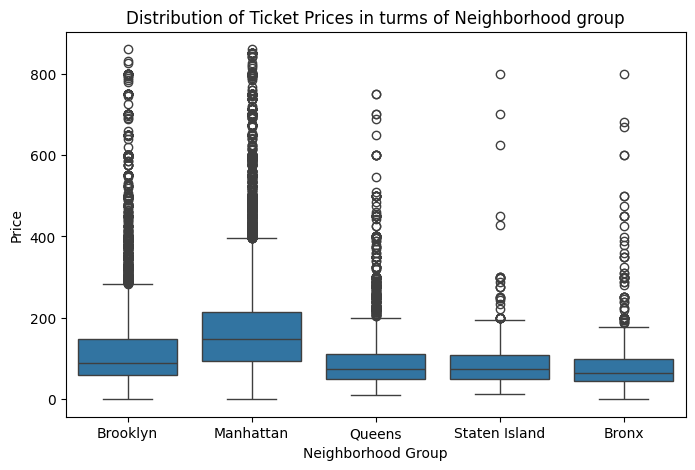

In [25]:
# Distribution of Ticket Prices in turms of Neighborhood group
plt.figure(figsize=(8, 5))  
sns.boxplot(x="neighbourhood_group", y="price", data=Outlier_removed_data)
plt.title("Distribution of Ticket Prices in turms of Neighborhood group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.show()

Which neighbourhood_group has the highest prices?

In [26]:
# Mean price in turms of neighbourhood_group
neighbourhood_group_mean_price = Outlier_removed_data.groupby("neighbourhood_group")["price"].mean().sort_values(ascending = False).round(2)

neighbourhood_group_mean_price

neighbourhood_group
Manhattan        174.86
Brooklyn         116.52
Staten Island     96.15
Queens            94.10
Bronx             84.44
Name: price, dtype: float64

In [27]:
type(neighbourhood_group_mean_price)

pandas.core.series.Series

In [28]:
 neighbourhood_group_mean_price.shape

(5,)

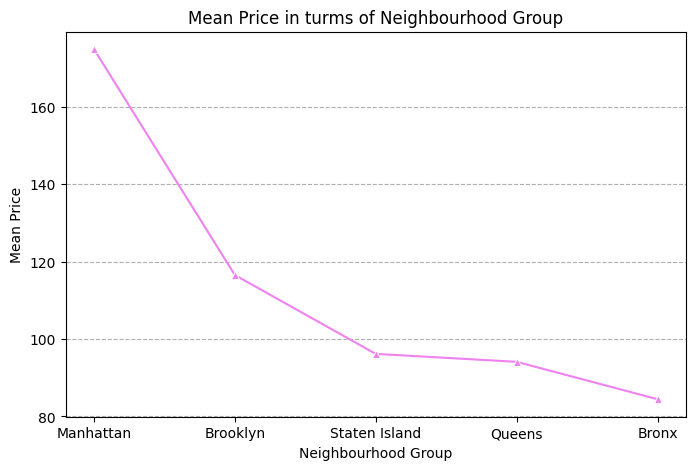

In [29]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=neighbourhood_group_mean_price.index,
             y=neighbourhood_group_mean_price.values,
             marker = '^',color='violet')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.title('Mean Price in turms of Neighbourhood Group')
plt.grid(axis='y', linestyle='--')
plt.show()

From the chart, we can observe Manhattan stands out as the most expensive Neighbourhood Group.

 Which neighbourhood has the highest prices?

In [30]:
# Top 10 Mean prices by neighbourhood

neighbourhood_mean_price = Outlier_removed_data.groupby("neighbourhood")["price"].mean().sort_values(ascending = False).round(2)


In [31]:
type(neighbourhood_mean_price)

pandas.core.series.Series

In [32]:
neighbourhood_mean_price.shape

(221,)

In [33]:
neighbourhood_mean_price_top_10 = neighbourhood_mean_price.head(10)
neighbourhood_mean_price_top_10

neighbourhood
Fort Wadsworth       800.00
Woodrow              700.00
Tribeca              305.79
NoHo                 276.25
Neponsit             274.67
Flatiron District    266.05
Midtown              258.35
Willowbrook          249.00
SoHo                 238.53
Riverdale            236.30
Name: price, dtype: float64

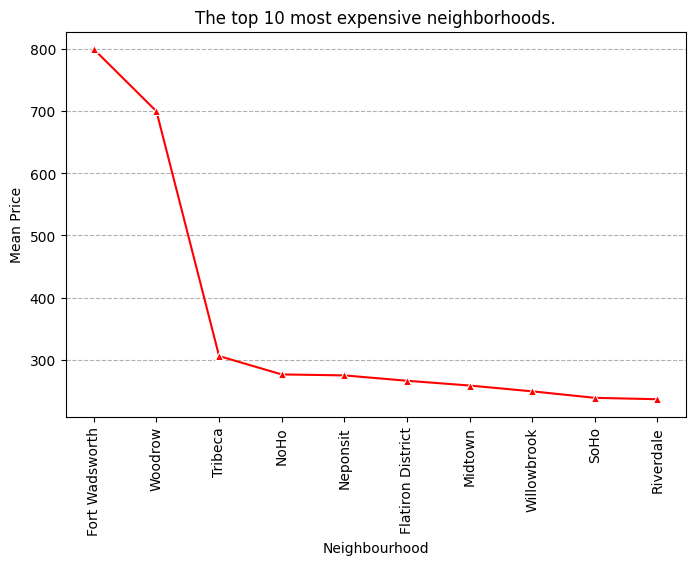

In [34]:
# The top 10 most expensive neighborhoods.
plt.figure(figsize=(8, 5))
sns.lineplot(x=neighbourhood_mean_price_top_10.index,
             y=neighbourhood_mean_price_top_10.values,
             marker = '^',color='red')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('The top 10 most expensive neighborhoods.')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Checking if the review rate is influencing the price.


In [35]:
neighbourhood_review_and_mean_price = Outlier_removed_data.groupby("neighbourhood").agg({
    "price": "mean",
    "number_of_reviews": "mean"
}).sort_values(by="price", ascending=False).round(1)
neighbourhood_review_and_mean_price.head(10)

,price,number_of_reviews
neighbourhood,,
Fort Wadsworth,800.0,0.0
Woodrow,700.0,0.0
Tribeca,305.8,12.4
NoHo,276.2,12.4
Neponsit,274.7,15.3
Flatiron District,266.1,18.9
Midtown,258.3,12.7
Willowbrook,249.0,9.0
SoHo,238.5,20.6


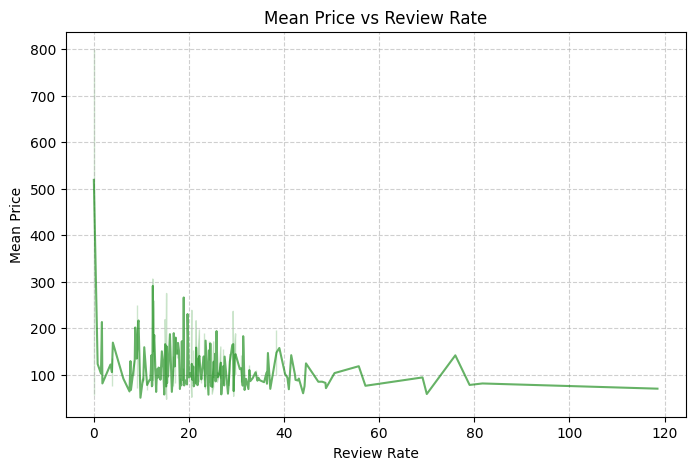

In [36]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=neighbourhood_review_and_mean_price["number_of_reviews"], 
                y=neighbourhood_review_and_mean_price["price"], 
                alpha=0.6, color='green')

plt.title('Mean Price vs Review Rate')
plt.xlabel('Review Rate')
plt.ylabel('Mean Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

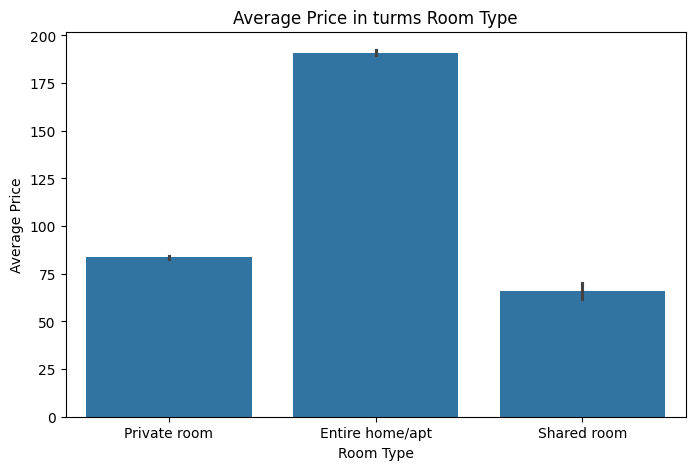

In [37]:
# Average Price in turms Room Type
plt.figure(figsize=(8, 5))
sns.barplot(x='room_type', y='price', data=Outlier_removed_data)
plt.title('Average Price in turms Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

In [38]:
Outlier_removed_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


# Feature engineering

In [39]:
from sklearn.preprocessing import OneHotEncoder


In [40]:
Cleaned_data_2 = Outlier_removed_data

In [41]:
Cleaned_data_2['minimum_nights'] = Outlier_removed_data['minimum_nights'].replace(0, 1)
Cleaned_data_2['price_per_night'] = Outlier_removed_data['price'] / Outlier_removed_data['minimum_nights']

C:\Users\NILADRI DAS\AppData\Local\Temp\ipykernel_11956\4054743303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_data_2['minimum_nights'] = Outlier_removed_data['minimum_nights'].replace(0, 1)
C:\Users\NILADRI DAS\AppData\Local\Temp\ipykernel_11956\4054743303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_data_2['price_per_night'] = Outlier_removed_data['price'] / Outlier_removed_data['minimum_nights']


In [42]:
Cleaned_data_2


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,149.000000
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,225.000000
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,50.000000
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,89.000000
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9,35.000000
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36,10.000000
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27,11.500000
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2,55.000000


Encoding categorical data


In [43]:
# Selecting categorical columns for encoding
categorical_columns = ['neighbourhood', 'neighbourhood_group', 'room_type']

In [44]:
# Applying one-hot encoding
Encoding = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = pd.DataFrame(Encoding.fit_transform(Cleaned_data_2[categorical_columns]))
encoded_data.columns = Encoding.get_feature_names_out(categorical_columns)

In [45]:
# Dropping original categorical columns and adding encoded columns
Featured_data = Cleaned_data_2.drop(columns=categorical_columns)
Featured_data = pd.concat([Cleaned_data_2, encoded_data], axis=1)

In [46]:
Featured_data.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.210000,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.380000,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.373221,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.640000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.100000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
Featured_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48893 entries, 0 to 48305
Columns: 238 entries, neighbourhood_group to room_type_Shared room
dtypes: float64(235), object(3)
memory usage: 89.2+ MB


In [48]:
print(Featured_data.dtypes)


neighbourhood_group                   object
neighbourhood                         object
latitude                             float64
longitude                            float64
room_type                             object
                                      ...   
neighbourhood_group_Manhattan        float64
neighbourhood_group_Queens           float64
neighbourhood_group_Staten Island    float64
room_type_Private room               float64
room_type_Shared room                float64
Length: 238, dtype: object


In [49]:
# Dropping all non numeric categorical columns
non_num_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
Featured_data = Featured_data.drop(columns=non_num_columns,axis=1)

In [50]:
print(Featured_data.dtypes)

latitude                             float64
longitude                            float64
price                                float64
minimum_nights                       float64
number_of_reviews                    float64
                                      ...   
neighbourhood_group_Manhattan        float64
neighbourhood_group_Queens           float64
neighbourhood_group_Staten Island    float64
room_type_Private room               float64
room_type_Shared room                float64
Length: 235, dtype: object


In [51]:
Featured_data.head(), Featured_data.shape

(   latitude  longitude  price  minimum_nights  number_of_reviews  \
 0  40.64749  -73.97237  149.0             1.0                9.0   
 1  40.75362  -73.98377  225.0             1.0               45.0   
 2  40.80902  -73.94190  150.0             3.0                0.0   
 3  40.68514  -73.95976   89.0             1.0              270.0   
 4  40.79851  -73.94399   80.0            10.0                9.0   
 
    reviews_per_month  calculated_host_listings_count  availability_365  \
 0           0.210000                             6.0             365.0   
 1           0.380000                             2.0             355.0   
 2           1.373221                             1.0             365.0   
 3           4.640000                             1.0             194.0   
 4           0.100000                             1.0               0.0   
 
    price_per_night  neighbourhood_Arden Heights  ...  neighbourhood_Woodhaven  \
 0            149.0                          0.0  

In [52]:
Featured_data.isnull().sum()

latitude                             386
longitude                            386
price                                386
minimum_nights                       386
number_of_reviews                    386
                                    ... 
neighbourhood_group_Manhattan        386
neighbourhood_group_Queens           386
neighbourhood_group_Staten Island    386
room_type_Private room               386
room_type_Shared room                386
Length: 235, dtype: int64

In [53]:
Featured_data.dropna(inplace=True)

In [54]:
Featured_data.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
                                    ..
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
Length: 235, dtype: int64

# Applying ML model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Defining the target variable and features
X = Featured_data.drop('price', axis=1)
y = Featured_data['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [58]:
# Checking the shape of the split datasets
split_shapes = {
    "X_Training Features shape": X_train.shape,
    "Y_Training Labels shape": y_train.shape,
    "X_Testing Features": X_test.shape,
    "Y_Testing Labels shape": y_test.shape
}
split_shapes

{'X_Training Features shape': (28872, 234),
 'Y_Training Labels shape': (28872,),
 'X_Testing Features': (19249, 234),
 'Y_Testing Labels shape': (19249,)}

# Applying Linear Regression for price prediction

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
# Applying Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predicting on the test set
y_predict_linear_reg = linear_reg.predict(X_test)
y_predict_linear_reg

array([108.71201323, 106.48170088,  87.75487516, ..., 108.82891176,
       147.31449125, 135.73141859])

In [62]:
# Evaluating the model
Mse_linear_reg = mean_squared_error(y_test, y_predict_linear_reg)
Accuracy_linear_reg = r2_score(y_test, y_predict_linear_reg)*100

Mse_linear_reg, Accuracy_linear_reg

(2.8340279512410856e+16, -240259908189060.06)

As we can see the accuracy is extremely poor. Its even -ve. So we will go for Decision tree regression method

# Decision tree regression for price prediction 

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
# Applying Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
# Predicting on the test set
y_predict_decision_tree = decision_tree_reg.predict(X_test)

In [66]:
# Evaluating the model
Mse_decision_tree = mean_squared_error(y_test, y_predict_decision_tree)
Accuracy_decision_tree = r2_score(y_test, y_predict_decision_tree)*100

Mse_decision_tree, Accuracy_decision_tree

(79.74424645436126, 99.32395355086923)

# End